In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
import os
# sklearn library 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import preprocessing
from io import BytesIO
from zipfile import ZipFile
#opencv
import cv2 as cv
#keras/Tensor
import  tensorflow as tf
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
import pydot
#from kt_utils import *
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
from keras.preprocessing.image import ImageDataGenerator

import os



In [ ]:

def get_ImageData(dir_path = "data/data/", image_size = (150, 150), batch_size = 32, validation_split = 0.2, color_mode = 'grayscale', label_mode = 'categorical'):

  if validation_split == None:
    subset = [None, None]
  else:
    subset = ["training", "validation"]
  
  train_ds = tf.keras.preprocessing.image_dataset_from_directory(directory = dir_path + "train",  
                                                                labels="inferred",
                                                                label_mode=label_mode,
                                                                class_names= ["normal", "covid", "pneumonia"],
                                                                color_mode=color_mode,
                                                                batch_size=batch_size,
                                                                image_size=image_size,
                                                                shuffle=True,
                                                                seed=42,
                                                                validation_split=validation_split,
                                                                subset=subset[0],
                                                                interpolation="bilinear",
                                                                follow_links=False,
                                                                crop_to_aspect_ratio=False,
                                                                )
  
  val_ds = tf.keras.preprocessing.image_dataset_from_directory(directory=dir_path + "train",                                                      
                                                              labels="inferred",
                                                              label_mode=label_mode,
                                                              class_names=["normal", "covid", "pneumonia"],
                                                              color_mode=color_mode,
                                                              batch_size=batch_size,
                                                              image_size=image_size,
                                                              shuffle=True,
                                                              seed=42,
                                                              validation_split=validation_split,
                                                              subset=subset[1],
                                                              interpolation="bilinear",
                                                              follow_links=False,
                                                              crop_to_aspect_ratio=False,
                                                              )

  test_ds = tf.keras.preprocessing.image_dataset_from_directory(directory = dir_path + "validation",                                                      
                                                                labels="inferred",
                                                                label_mode=label_mode,
                                                                class_names=["normal", "covid", "pneumonia"],
                                                                color_mode=color_mode,
                                                                batch_size=batch_size,
                                                                image_size=image_size,
                                                                shuffle=False,
                                                                seed=42,
                                                                validation_split=None,
                                                                subset=None,
                                                                interpolation="bilinear",
                                                                follow_links=False,
                                                                crop_to_aspect_ratio=False,
                                                                )

  
  return train_ds, val_ds, test_ds
  

In [2]:
import glob
import random
import shutil
import math
total = 0
for name in glob.glob("/home/alegria/FAA/FAA_FinalProject/FAA_FinalProject/COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset/*/*"):
    total =  total +1    


In [3]:
# source directory
os.chdir("/home/alegria/FAA/FAA_FinalProject/FAA_FinalProject/COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset")
#/home/alegria/FAA/FAA_FinalProject/FAA_FinalProject/COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset/covid

train_div = math.floor(int((total*0.6)/3))
test_div = math.floor(int((total*0.2)/3))
val_div = math.floor(int((total*0.2)/3))

if os.path.isdir("train/covid") is True:
    print("s")
else:
    os.makedirs("train/covid")
    os.makedirs("train/pneumonia")
    os.makedirs("train/normal")
    os.makedirs("test/covid")
    os.makedirs("test/pneumonia")
    os.makedirs("test/normal")
    os.makedirs("validation/covid")
    os.makedirs("validation/pneumonia")
    os.makedirs("validation/normal")

    for c in random.sample(glob.glob("covid/*"),train_div):
        shutil.move(c,"train/covid")
    for c in random.sample(glob.glob("pneumonia/*"),train_div):
        shutil.move(c,"train/pneumonia")
    for c in random.sample(glob.glob("normal/*"),train_div):
        shutil.move(c,"train/normal")

    for c in random.sample(glob.glob("covid/*"),test_div):
        shutil.move(c,"test/covid")
    for c in random.sample(glob.glob("pneumonia/*"),test_div):
        shutil.move(c,"test/pneumonia")
    for c in random.sample(glob.glob("normal/*"),test_div):
        shutil.move(c,"test/normal")
    for c in random.sample(glob.glob("covid/*"),val_div):
        shutil.move(c,"validation/covid")
    for c in random.sample(glob.glob("pneumonia/*"),val_div):
        shutil.move(c,"validation/pneumonia")
    for c in random.sample(glob.glob("normal/*"),val_div):
        shutil.move(c,"validation/normal")


s


In [4]:
dir_path = "/home/alegria/FAA/FAA_FinalProject/FAA_FinalProject/COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset/"
train_batches = ImageDataGenerator().flow_from_directory(directory=dir_path + "train", target_size=(150,150), classes=['normal', 'covid', 'pneumonia'], batch_size=32, color_mode = "rgb")
test_batches = ImageDataGenerator().flow_from_directory(directory=dir_path + "test", target_size=(150,150), classes=['normal', 'covid', 'pneumonia'], batch_size=32, color_mode = "rgb")
val_batches = ImageDataGenerator().flow_from_directory(directory=dir_path + "validation", target_size=(150,150), classes=['normal', 'covid', 'pneumonia'], batch_size=32, color_mode = "rgb", shuffle=False)

Found 2745 images belonging to 3 classes.
Found 915 images belonging to 3 classes.
Found 915 images belonging to 3 classes.


In [ ]:
image_size = (150, 150)
batch_size = 32
validation_split = 0.1
color_mode = "rgb"
label_mode = 'int'
train_ds, val_ds, test_ds = get_ImageData(dir_path = dir_path, image_size = image_size, batch_size = batch_size, validation_split = validation_split, color_mode = color_mode, label_mode = label_mode)

In [ ]:
class_names = train_ds.class_names
print(class_names)

plt.figure(figsize=(5, 5))
for images, labels in train_ds.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization


model = Sequential([
Conv2D(filters = 32 , kernel_size =(3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,3)),
BatchNormalization(),
MaxPool2D(pool_size=(2,2),strides = 2),
Dropout(0.1),
BatchNormalization(),
MaxPool2D((2,2) , strides = 2 , padding = 'same'),
Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'),
BatchNormalization(),
MaxPool2D((2,2) , strides = 2 , padding = 'same'),
Dropout(0.2),
BatchNormalization(),
MaxPool2D((2,2) , strides = 2 , padding = 'same'),
Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'),
Dropout(0.2),
BatchNormalization(),
MaxPool2D((2,2) , strides = 2 , padding = 'same'),
Flatten(),S
Dense(units = 128 , activation = 'relu'),
Dropout(0.2),
Dense(units = 3 , activation = 'softmax')])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 32)       128       
 hNormalization)                                                 
                                                        

2022-02-27 02:00:01.190711: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-27 02:00:01.257382: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-27 02:00:01.257631: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-27 02:00:01.265833: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [6]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [7]:

history = model.fit(x =train_batches,epochs = 10 , validation_data = val_batches ,callbacks = [learning_rate_reduction])


Epoch 1/10


2022-02-26 12:45:22.010552: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8301
2022-02-26 12:45:22.585594: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


86/86 [==============================] - 105s 1s/step - loss: 0.7796 - accuracy: 0.8029 - val_loss: 0.5820 - val_accuracy: 0.7923 - lr: 0.0010
Epoch 2/10
86/86 [==============================] - 103s 1s/step - loss: 0.3024 - accuracy: 0.8958 - val_loss: 0.3195 - val_accuracy: 0.9093 - lr: 0.0010
Epoch 3/10
86/86 [==============================] - 104s 1s/step - loss: 0.2541 - accuracy: 0.9202 - val_loss: 0.2645 - val_accuracy: 0.9202 - lr: 0.0010
Epoch 4/10
86/86 [==============================] - 104s 1s/step - loss: 0.2454 - accuracy: 0.9224 - val_loss: 0.3589 - val_accuracy: 0.8929 - lr: 0.0010
Epoch 5/10
86/86 [==============================] - ETA: 0s - loss: 0.2124 - accuracy: 0.9330
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
86/86 [==============================] - 105s 1s/step - loss: 0.2124 - accuracy: 0.9330 - val_loss: 1.0301 - val_accuracy: 0.6536 - lr: 0.0010
Epoch 6/10
86/86 [==============================] - 102s 1s/step - loss: 0.1592 - 

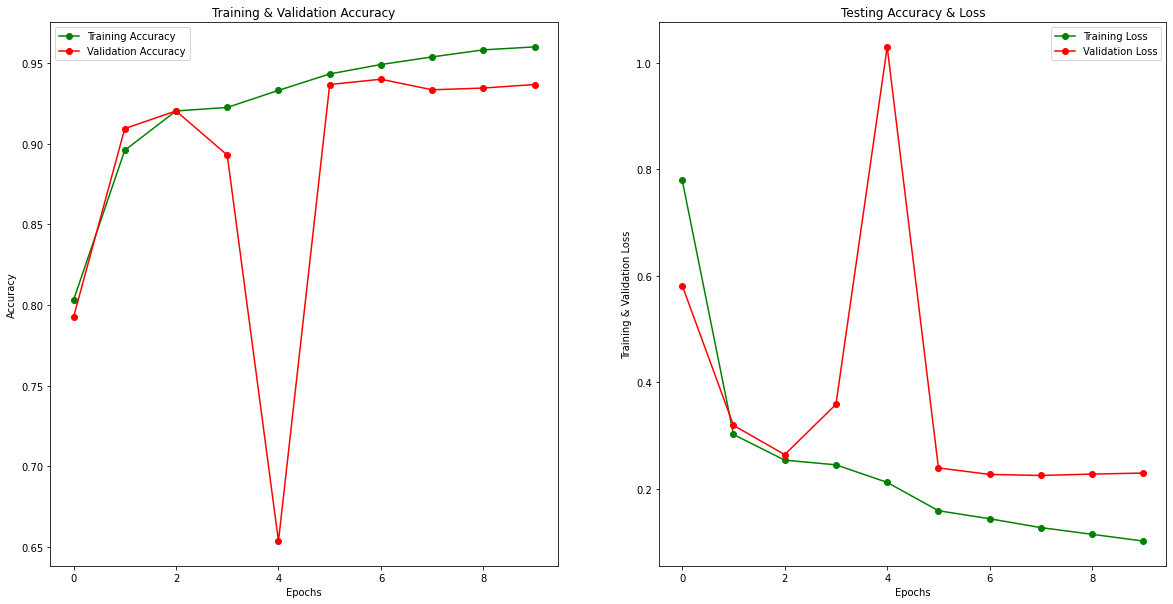

In [8]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [9]:
predictions = model.predict(x = test_batches, verbose = 0)

In [10]:
np.round(predictions)

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true = test_batches.classes, y_pred = np.argmax(predictions,axis = -1))

In [12]:
import itertools    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [13]:
test_batches.class_indices

{'normal': 0, 'covid': 1, 'pneumonia': 2}

Confusion matrix, without normalization
[[111  98  96]
 [113 111  81]
 [113  91 101]]


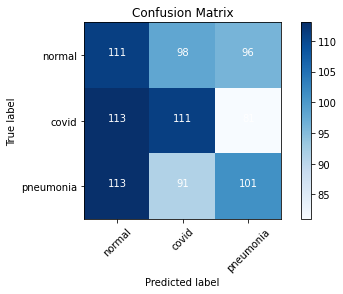

In [14]:
cm_plot_labels = ['normal','covid','pneumonia']
plot_confusion_matrix(cm = cm, classes= cm_plot_labels, title = 'Confusion Matrix')

<AxesSubplot:>

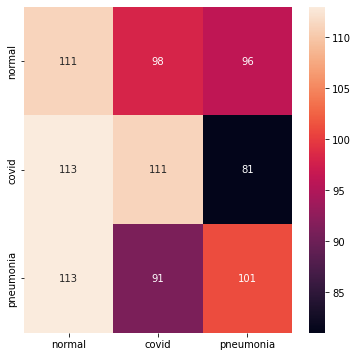

In [15]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=["normal", "covid", "pneumonia"], yticklabels=["normal", "covid", "pneumonia"])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        rescale = 1./255,
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


In [ ]:
train_generator = datagen.flow_from_directory(directory=dir_path + "train", target_size=(150,150),batch_size = 32)
val_generator = datagen.flow_from_directory(directory=dir_path + "validation", target_size=(150,150),batch_size = 32)
test_generator = datagen.flow_from_directory(directory=dir_path + "test", target_size=(150,150),batch_size = 32)

In [ ]:
learning_rate_reduction_ = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy' , metrics = ['accuracy'])
history = model.fit(x =train_generator,epochs = 10 , validation_data = val_generator ,callbacks = [learning_rate_reduction_])

In [ ]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [ ]:
predictions = model.predict(x = test_generator, verbose = 0)

In [ ]:
cm = confusion_matrix(y_true = test_generator.classes, y_pred = np.argmax(predictions,axis = -1))
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=["normal", "covid", "pneumonia"], yticklabels=["normal", "covid", "pneumonia"])